In [44]:
import tensorflow as tf

tf.__version__

# output should be higher than 1.10.0

'1.13.0-rc2'

In [45]:
mnist = tf.keras.datasets.mnist
# a database of 28x28 images of handwritten digits from 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

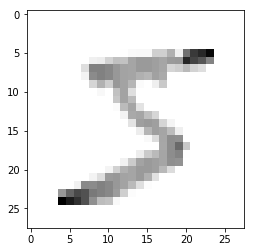

In [46]:
import matplotlib.pyplot as plt

# print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [58]:
model.fit(x_train, y_train, epochs=8)

Epoch 1/8
60000/60000 [==============================] - 32s 536us/sample - loss: 0.0523 - acc: 0.9845
Epoch 2/8
60000/60000 [==============================] - 32s 540us/sample - loss: 0.0432 - acc: 0.9875
Epoch 3/8
60000/60000 [==============================] - 32s 538us/sample - loss: 0.0343 - acc: 0.9904
Epoch 4/8
60000/60000 [==============================] - 32s 536us/sample - loss: 0.0327 - acc: 0.9908
Epoch 5/8
60000/60000 [==============================] - 32s 539us/sample - loss: 0.0291 - acc: 0.9917
Epoch 6/8
60000/60000 [==============================] - 33s 542us/sample - loss: 0.0254 - acc: 0.9928
Epoch 7/8
60000/60000 [==============================] - 33s 542us/sample - loss: 0.0244 - acc: 0.9930
Epoch 8/8
60000/60000 [==============================] - 33s 547us/sample - loss: 0.0250 - acc: 0.9936


In [59]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 95us/sample - loss: 0.1214 - acc: 0.9758
0.12144777521483065 0.9758


In [54]:
model.save('chris_mnist.model')
# to save a trained model

In [55]:
new_model = tf.keras.models.load_model('chris_mnist.model')

predictions = new_model.predict(x_test)

# print(predictions)

import numpy as np

print('Prediction is:', np.argmax(predictions[0]))

Prediction is: 7


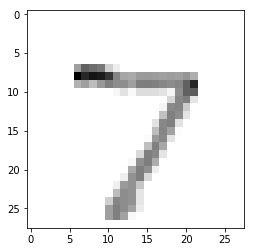

In [57]:
plt.imshow(x_test[0], cmap = plt.cm.binary)